📁 Step 1: Importing the Dataset
In this step, we'll load the placement dataset into our environment using Pandas, one of the most popular Python libraries for data manipulation. The dataset contains various features describing a student's academic profile, extracurricular activities, and other relevant factors.

In [2]:
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('college_student_placement_dataset.csv')
print("Original Data Head:")
print(df.head())

# Dropping the College_ID column since it does not affect the results
df = df.drop('College_ID', axis=1)
print("\nData Head after dropping College_ID:")
print(df.head())


# Initialize the LabelEncoder
le = LabelEncoder()

# List of columns to encode
columns_to_encode = ['Internship_Experience', 'Placement']

# Apply the encoder to each column
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

print("\nFinal Processed Data Head:")
print(df.head())

print("\nData Info after processing:")
print(df.info())

Original Data Head:
  College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0    CLG0030  107             6.61  6.28                     8   
1    CLG0061   97             5.52  5.37                     8   
2    CLG0036  109             5.36  5.83                     9   
3    CLG0055  122             5.47  5.75                     6   
4    CLG0004   96             7.91  7.69                     7   

  Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                    No                       8                     8   
1                    No                       7                     8   
2                    No                       3                     1   
3                   Yes                       1                     6   
4                    No                       8                    10   

   Projects_Completed Placement  
0                   4        No  
1                   0        No  
2                   1        No  
3       

🧪 Step 2: Preprocessing and Model Training
Now that we’ve imported the dataset, it’s time to clean and prepare the data for modeling. Machine learning models require numeric input, so we’ll convert categorical columns into numerical format and split our data into features and target variables.

After preprocessing, we’ll train a Random Forest Classifier, a powerful ensemble model known for its robustness and ability to measure feature importance. This model will help us predict student placement outcomes based on academic and extracurricular profiles.

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# --- Load and Prepare the Data (Repeating from previous step for a complete, runnable cell) ---
df = pd.read_csv('college_student_placement_dataset.csv')
df = df.drop('College_ID', axis=1)
le = LabelEncoder()
for col in ['Internship_Experience', 'Placement']:
    df[col] = le.fit_transform(df[col])

# --- Step 2: Train the Predictive Model ---

# Separate the features (X) from the target variable (y) Q&A
# X contains all columns except 'Placement'
X = df.drop('Placement', axis=1)
# y contains only the 'Placement' column
y = df['Placement']

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing
# random_state=42 ensures the split is the same every time, making results reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} students")
print(f"Testing set size: {X_test.shape[0]} students")

# Initialize the RandomForestClassifier
# n_estimators=100 means the model will build 100 decision trees
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
print("\nTraining the model...")
model.fit(X_train, y_train)
print("Model training complete.")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on Test Data: {accuracy:.4f}")

Training set size: 8000 students
Testing set size: 2000 students

Training the model...
Model training complete.

Model Accuracy on Test Data: 1.0000


📊 Step 3: Feature Importance Analysis
Understanding which features influence placement decisions the most helps us move beyond black-box predictions and into actionable insights.

In this step, we’ll tap into the Random Forest's built-in feature importance metrics to rank the relevance of each input variable. Then, we'll visualize this using a bar chart for easy interpretation.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
%matplotlib inline

Feature names: ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 'Internship_Experience', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed']


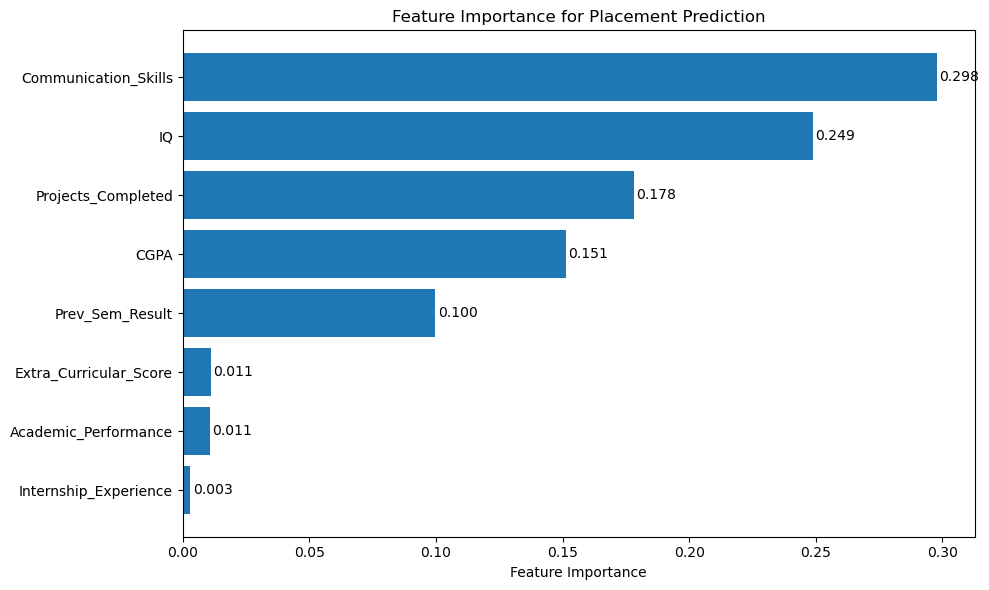

Feature Importance Ranking:
Communication_Skills: 0.2978
IQ: 0.2487
Projects_Completed: 0.1780
CGPA: 0.1512
Prev_Sem_Result: 0.0997
Extra_Curricular_Score: 0.0110
Academic_Performance: 0.0106
Internship_Experience: 0.0029

COMPLETE - Feature importance analysis done!


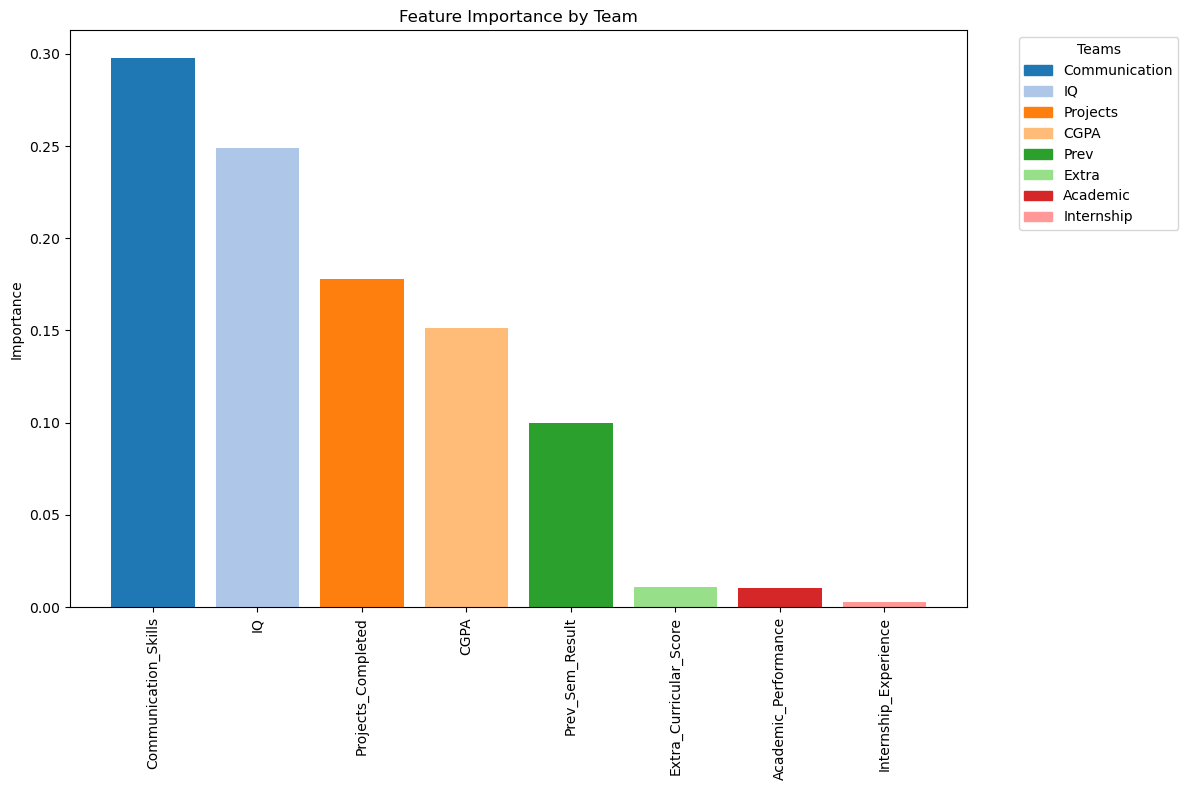

In [19]:
# Analyze feature importance
feature_names = list(X.columns)
print("Feature names:", feature_names)

# Analyze and visualize feature importance
importance_df = analyze_feature_importance(model, feature_names)

print("\n" + "="*60)
print("COMPLETE - Feature importance analysis done!")
print("="*60)

# 1. Extract team names 
# Example: if features are named "TeamA_StatX", this splits to get "TeamA"
importance_df['Team'] = importance_df['Feature'].apply(lambda x: x.split('_')[0])

# 2. Create color mapping for teams
teams = importance_df['Team'].unique()
colormap = plt.colormaps.get_cmap('tab20')  # Use a colormap
team_colors = {team: colormap(i) for i, team in enumerate(teams)}

# 3. Create a color list for each feature
bar_colors = [team_colors[team] for team in importance_df['Team']]

# 4. Plot with team colors
plt.figure(figsize=(12, 8))
plt.bar(importance_df['Feature'], importance_df['Importance'], color=bar_colors)
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.title('Feature Importance by Team')

# 5. Add legend for teams
legend_handles = [mpatches.Patch(color=color, label=team) for team, color in team_colors.items()]
plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', title='Teams')

plt.tight_layout()
plt.show()

🤖 Step 4: Personalized Recommendation Engine
With our model trained and key features identified, we now move from prediction to prescription, offering students actionable advice based on their profiles.

In this step, we'll build a simple yet powerful function that:

Accepts a student's data

Evaluates their performance across the top influential features

Generates custom recommendations to help improve their placement prospects

This bridges machine learning with human-centered guidance, making the results not just explainable but also empowering.

In [21]:
def get_placement_recommendations(student_dict, model, feature_names, importance_df, top_n=3):
    """
    Generate personalized placement recommendations for a student
    based on feature importance and their current profile.
    """
    # Define ideal target values for each feature (adjust based on your domain knowledge)
    ideal_values = {
        'IQ': 130,
        'Prev_Sem_Result': 90,
        'CGPA': 9.0,
        'Academic_Performance': 9,
        'Internship_Experience': 2,  # Max encoded value
        'Extra_Curricular_Score': 9,
        'Communication_Skills': 9,
        'Projects_Completed': 3
    }
    
    # Create a DataFrame from the student dictionary
    student_data = pd.DataFrame([student_dict], columns=feature_names)
    
    # Predict placement probability
    if hasattr(model, 'predict_proba'):
        proba = model.predict_proba(student_data)[0]
        placement_prob = proba[1]  # Probability of class 1 (placed)
    else:
        placement_prob = model.predict(student_data)[0]
    
    # Prepare recommendation analysis
    recommendations = []
    student_values = student_dict
    
    # Analyze each feature's improvement potential
    for feature in feature_names:
        if feature not in student_values or feature not in ideal_values:
            continue
            
        importance = importance_df.loc[importance_df['Feature'] == feature, 'Importance'].values[0]
        current_val = student_values[feature]
        ideal_val = ideal_values[feature]
        gap = ideal_val - current_val
        
        # Only consider features with positive importance and an existing gap
        if importance > 0 and gap > 0:
            improvement_potential = gap * importance
            recommendations.append({
                'feature': feature,
                'current': current_val,
                'ideal': ideal_val,
                'gap': gap,
                'importance': importance,
                'improvement_potential': improvement_potential
            })
    
    # Sort by improvement potential (highest first)
    recommendations.sort(key=lambda x: x['improvement_potential'], reverse=True)
    
    # Generate actionable messages for top recommendations
    messages = []
    for rec in recommendations[:top_n]:
        msg = (f"Improve {rec['feature']} from {rec['current']} to {rec['ideal']} "
               f"(gap: {rec['gap']:.1f}, importance: {rec['importance']:.4f})")
        messages.append(msg)
    
    return placement_prob, messages

# Now, define your sample student
sample_student = {
    'IQ': 105,
    'Prev_Sem_Result': 72.5,
    'CGPA': 6.8,
    'Academic_Performance': 6,
    'Internship_Experience': 0,
    'Extra_Curricular_Score': 5,
    'Communication_Skills': 6,
    'Projects_Completed': 1
}

# Get personalized recommendations
placement_prob, recommendations = get_placement_recommendations(
    sample_student, model, feature_names, importance_df
)

print(f"\nPredicted Placement Probability: {placement_prob:.2%}")
print("\nTop Recommendations:")
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")

print("\n" + "="*60)
print("COMPLETE - Student recommendations generated!")
print("="*60)


Predicted Placement Probability: 1.00%

Top Recommendations:
1. Improve IQ from 105 to 130 (gap: 25.0, importance: 0.2487)
2. Improve Prev_Sem_Result from 72.5 to 90 (gap: 17.5, importance: 0.0997)
3. Improve Communication_Skills from 6 to 9 (gap: 3.0, importance: 0.2978)

COMPLETE - Student recommendations generated!
